In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
emmarex_plantdisease_path = kagglehub.dataset_download('emmarex/plantdisease')
packagemanager_pm_81122849_at_04_20_2025_10_37_25_path = kagglehub.notebook_output_download('packagemanager/pm-81122849-at-04-20-2025-10-37-25')

print('Data source import complete.')


Extracting files...
Data source import complete.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import VGG16, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [5]:
image_size = (224, 224)

train_dir = '/kaggle/input/plantdisease/PlantVillage'

data_generator = ImageDataGenerator(rescale=1.0/255.0,validation_split = 0.2)

train_data = data_generator.flow_from_directory(train_dir,target_size=image_size,batch_size=32,class_mode='categorical',subset='training',shuffle=True)

val_data = data_generator.flow_from_directory(train_dir,target_size=image_size,batch_size=32,class_mode='categorical',subset='validation',shuffle=True)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [6]:
class_name = list(train_data.class_indices.keys())
print(class_name)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [7]:
#using MobileNetV2
base_model_mobileNet=MobileNetV2(weights="imagenet", include_top = False, input_shape=(224,224,3))
base_model_mobileNet.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
model_mobileNet = Sequential([
    base_model_mobileNet,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'), # Add a Dense layer
    Dropout(0.5), # Add a dropout layer
    Dense(len(train_data.class_indices), activation='softmax') # Output layer
])

In [9]:
model_mobileNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,921,551 (11.14 MB)

 Trainable params: 663,567 (2.53 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:
model_mobileNet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
#define callbacks

callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [12]:
#train the model
history = model_mobileNet.fit(
    train_data,
    epochs=100,
    validation_data=val_data,
    callbacks=[callback]
)

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.6751 - loss: 1.0540 - val_accuracy: 0.8823 - val_loss: 0.3661
Epoch 2/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.8560 - loss: 0.4235 - val_accuracy: 0.8903 - val_loss: 0.3190
Epoch 3/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 847s 2s/step - accuracy: 0.8852 - loss: 0.3369 - val_accuracy: 0.9148 - val_loss: 0.2428
Epoch 4/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 857s 2s/step - accuracy: 0.9008 - loss: 0.2976 - val_accuracy: 0.9064 - val_loss: 0.2734
Epoch 5/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.9118 - loss: 0.2598 - val_accuracy: 0.9129 - val_loss: 0.2508
Epoch 6/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - accuracy: 0.9199 - loss: 0.2320 - val_accuracy: 0.9168 - val_loss: 0.2373
Epoch 7/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 823s 2s/step - accuracy: 0.9274 - loss: 0.2036 - val_accuracy: 0.9231 - val_loss: 0.2246
Epoch 8/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 815s 2s/step - accuracy: 0.9279 - loss: 0.2015 - 

In [13]:
print('Model accuracy:',history.history['accuracy'])

Model accuracy: [0.7717970609664917, 0.8651005029678345, 0.8899854421615601, 0.9037902355194092, 0.9111770391464233, 0.9186243414878845, 0.9229837656021118, 0.9295228719711304, 0.932974100112915, 0.9384233355522156, 0.9410874247550964, 0.9469605088233948, 0.9497457146644592, 0.9532574415206909, 0.9527125358581543, 0.954771101474762, 0.9568902850151062, 0.957314133644104, 0.9546500444412231, 0.9633083343505859, 0.9654274582862854]


In [14]:
model_mobileNet.save(r"mobilenetAICropPrediction.h5")

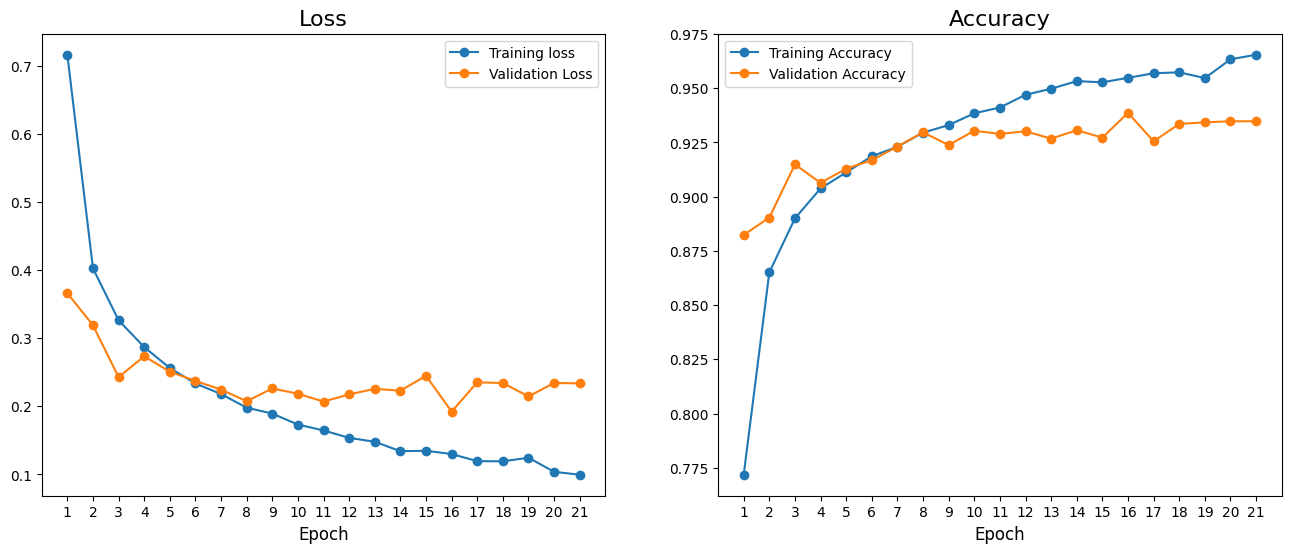

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
title_fontsize = 16
axis_fontsize = 12

total_epochs = len(history.history['accuracy'])

ax1.plot(range(1, total_epochs + 1), history.history['loss'], marker='o', label='Training loss')
ax1.plot(range(1, total_epochs + 1), history.history['val_loss'], marker='o', label='Validation Loss')
ax1.legend()
ax1.set_xticks(range(1, total_epochs + 1))
ax1.set_title('Loss', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=axis_fontsize)

ax2.plot(range(1, total_epochs + 1), history.history['accuracy'], marker='o', label='Training Accuracy')
ax2.plot(range(1, total_epochs + 1), history.history['val_accuracy'], marker='o', label='Validation Accuracy')
ax2.legend()
ax2.set_xticks(range(1, total_epochs + 1))
ax2.set_title('Accuracy', fontsize=title_fontsize)
ax2.set_xlabel('Epoch', fontsize=axis_fontsize);

In [19]:
#predict classes for 1000 images
y_true = []
y_pred = []
limit=1000
for image, labels in val_data:
    y_true.extend(np.argmax(labels, axis = 1))
    preds = model_mobileNet.predict(image)
    y_pred.extend(np.argmax(preds, axis=1))
    limit-=1
    if limit==0:
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [20]:
accuracy = accuracy_score(y_true, y_pred)
precision= precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
classification = classification_report(y_true, y_pred, target_names = class_name)
print(f"precision:{precision}")
print(f"recall:{recall}")
print(f"accuracy:{accuracy}")
print(f"classification:{classification}")

precision:0.1577579283615697
recall:0.07162525815132362
accuracy:0.07162525815132362
classification:                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.00      0.00      0.00      1551
                     Pepper__bell___healthy       0.00      0.00      0.00      2293
                      Potato___Early_blight       0.02      0.02      0.02      1555
                       Potato___Late_blight       0.01      0.01      0.01      1544
                           Potato___healthy       0.00      0.00      0.00       231
                      Tomato_Bacterial_spot       0.09      0.05      0.07      3297
                        Tomato_Early_blight       0.01      0.01      0.01      1543
                         Tomato_Late_blight       0.17      0.01      0.02      2953
                           Tomato_Leaf_Mold       0.02      0.01      0.01      1474
                  Tomato_Septoria_leaf_spot      

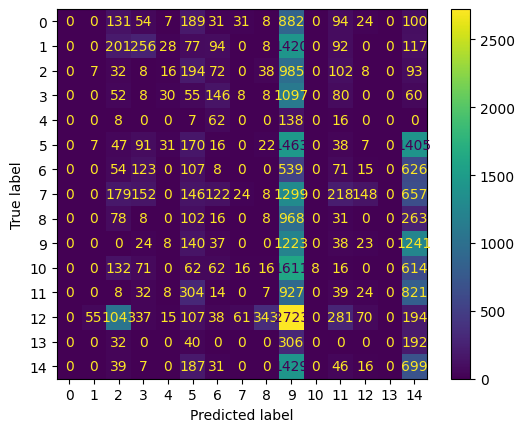

In [21]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

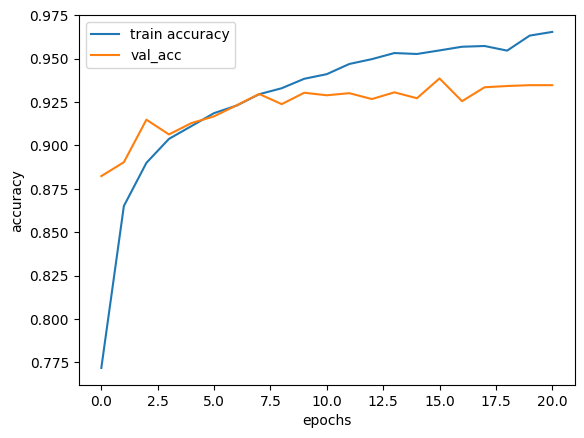

In [22]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history['val_accuracy'], label = "val_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

🌿 Sample images from different plant disease categories:


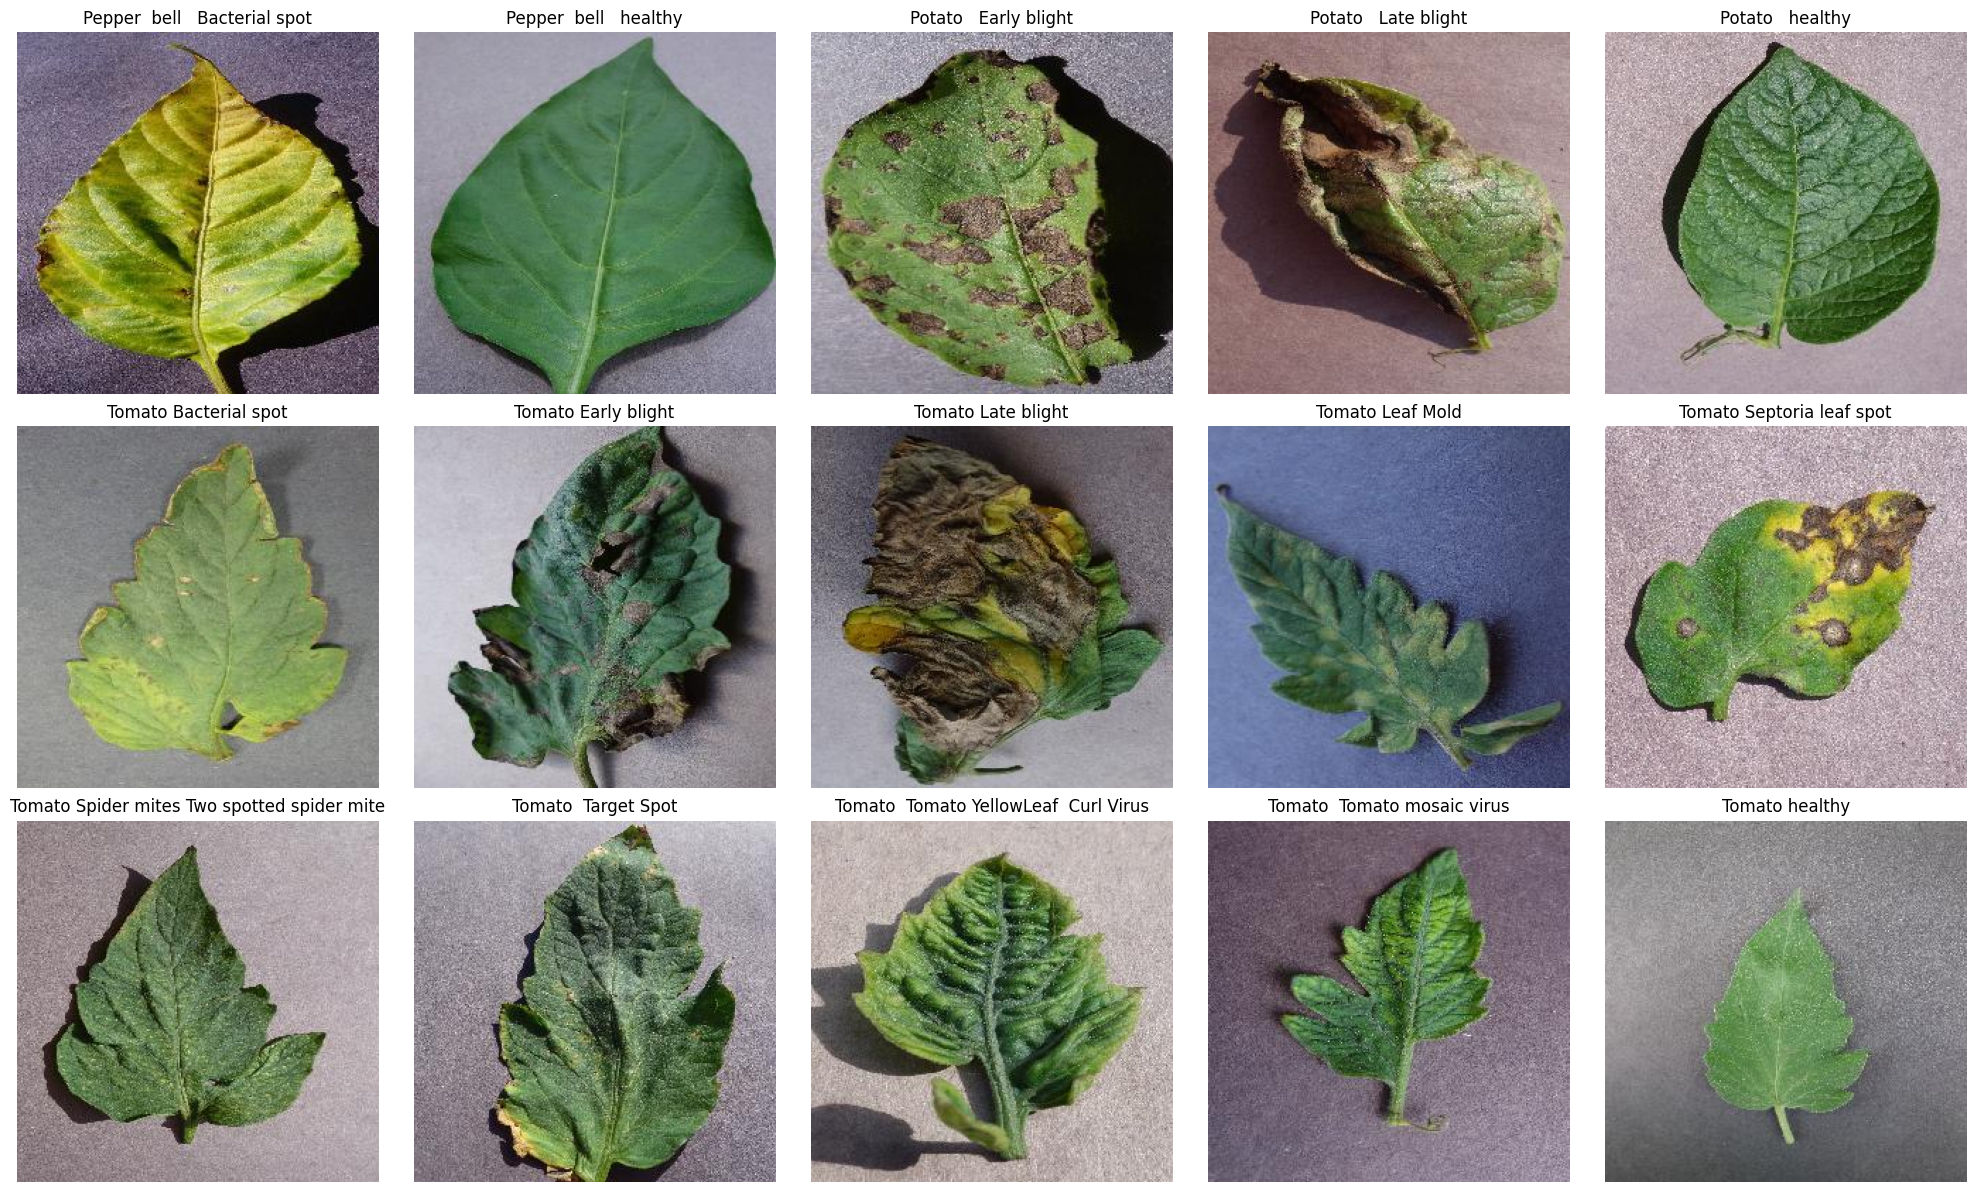

In [23]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import numpy as np

def display_disease_samples(data_dir, plants=None, num_cols=5):
    disease_folders = sorted([f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))])

    if plants is not None:
        disease_folders = [f for f in disease_folders if any(p in f for p in plants)]

    num_diseases = len(disease_folders)
    num_rows = (num_diseases + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
    axes = axes.flatten() if num_rows > 1 else axes

    for i, disease_folder in enumerate(disease_folders):
        folder_path = os.path.join(data_dir, disease_folder)

        img_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if img_files:
            img_path = os.path.join(folder_path, random.choice(img_files))
            img = Image.open(img_path).convert('RGB')

            disease_name = disease_folder.replace('_', ' ')

            axes[i].imshow(img)
            axes[i].set_title(disease_name, fontsize=12)
            axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

print("🌿 Sample images from different plant disease categories:")
display_disease_samples("/kaggle/input/plantdisease/PlantVillage")

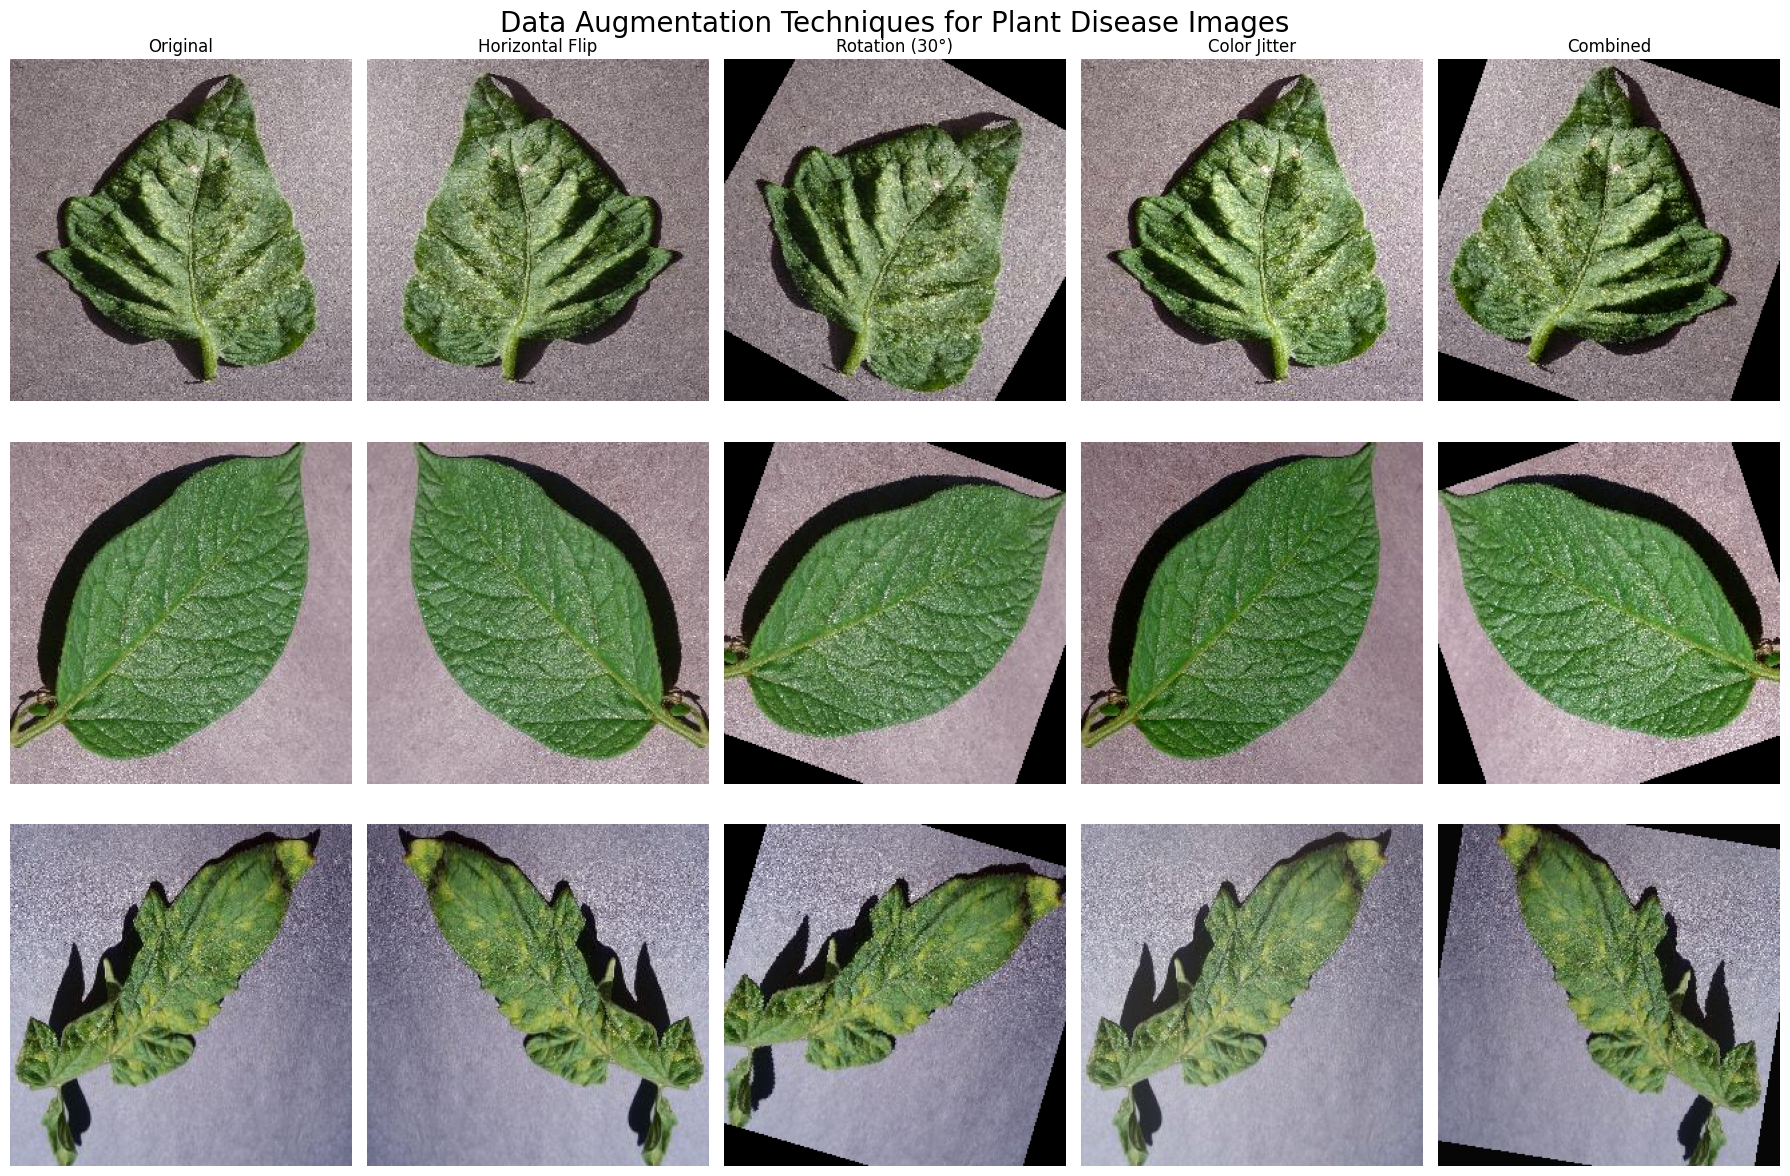

In [24]:
from torchvision import transforms

def show_augmentations(data_dir, num_plants=3):
    disease_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
    selected_folders = random.sample(disease_folders, min(num_plants, len(disease_folders)))

    # Define augmentations to display like the training used one.
    augmentations = [
        ("Original", transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor()
        ])),
        ("Horizontal Flip", transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.ToTensor()
        ])),
        ("Rotation (30°)", transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomRotation(30),
            transforms.ToTensor()
        ])),
        ("Color Jitter", transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor()
        ])),
        ("Combined", transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(20),
            transforms.ColorJitter(brightness=0.1, contrast=0.1),
            transforms.ToTensor()
        ]))
    ]

    fig, axes = plt.subplots(len(selected_folders), len(augmentations), figsize=(18, 4 * len(selected_folders)))

    for i, folder in enumerate(selected_folders):
        folder_path = os.path.join(data_dir, folder)

        img_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if not img_files:
            continue

        img_path = os.path.join(folder_path, random.choice(img_files))
        original_img = Image.open(img_path).convert('RGB')

        for j, (aug_name, transform) in enumerate(augmentations):
            img_tensor = transform(original_img)

            img_np = img_tensor.permute(1, 2, 0).numpy()

            ax = axes[i, j] if len(selected_folders) > 1 else axes[j]
            ax.imshow(img_np)

            if i == 0:
                ax.set_title(aug_name, fontsize=12)

            if j == 0:
                disease_name = folder.replace('_', ' ')
                ax.set_ylabel(disease_name, fontsize=10)

            ax.axis('off')

    plt.tight_layout()
    plt.suptitle("Data Augmentation Techniques for Plant Disease Images", fontsize=20, y=1.0)
    plt.show()

show_augmentations("/kaggle/input/plantdisease/PlantVillage")

In [25]:
#creating a model with more hidden layers

model_mobileNet_2 = Sequential([
    base_model_mobileNet,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'), # Add a Dense layer
    Dropout(0.5), # Add a dropout layer
    BatchNormalization(),
    Dense(256, activation = 'relu'),# Add a Dense layer
    Dropout(0.5), # Add a dropout layer
    BatchNormalization(),
    Dense(128, activation = 'relu'),# Add a Dense layer
    Dropout(0.5), # Add a dropout layer
    Dense(len(train_data.class_indices), activation='softmax') # Output layer
])

In [26]:
model_mobileNet_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,083,087 (11.76 MB)

 Trainable params: 823,567 (3.14 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

In [27]:
model_mobileNet_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [ ]:
#train the model
history2 = model_mobileNet_2.fit(
    train_data,
    epochs=100,
    validation_data=val_data,
    callbacks=[callback]
)

NameError: name 'model_mobileNet_2' is not defined

In [ ]:
model_mobileNet_2.save("mobilenetAICropPrediction_version2.h5")

In [ ]:
#Using DenseNet

base_model = DenseNet121(weights="imagenet", include_top = False, input_shape=(224,224,3))
base_model.trainable = False


In [ ]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(15, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model.fit(train_data, epochs= 100, validation_data = val_data, callbacks = [callback])

In [ ]:
model.save("densenetAICropPrediction.h5")

In [ ]:
#removing some layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(15, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model.fit(train_data, epochs= 100, validation_data = val_data, callbacks = [callback])

In [ ]:
model.save("densenetAICropPrediction_ver2.h5")

In [ ]:
#predict classes for 1000 images
y_true = []
y_pred = []
limit=1000
for image, labels in val_data:
    y_true.extend(np.argmax(labels, axis = 1))
    preds = model.predict(image)
    y_pred.extend(np.argmax(preds, axis=1))
    limit-=1
    if limit==0:
        break

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision= precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
classification = classification_report(y_true, y_pred, target_names = class_name)
print(f"precision:{precision}")
print(f"recall:{recall}")
print(f"accuracy:{accuracy}")
print(f"classification:{classification}")

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [ ]:
plt.plot(history4.history["accuracy"], label="train accuracy")
plt.plot(history4.history['val_accuracy'], label = "val_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
#Using VGG16
base_model_2 = VGG16(weights="imagenet", include_top = False, input_shape=(224,224,3))
base_model_2.trainable = False

In [ ]:
model = Sequential()
model.add(base_model_2)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(15, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history5 = model.fit(train_data, epochs= 100, validation_data = val_data, callbacks = [callback])

In [ ]:
model.save("vgg16_AICropPrediction.h5")